In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from scipy import stats
from sklearn.tree import DecisionTreeClassifier # Import Decision Tree Classifier
from sklearn.model_selection import train_test_split # Import train_test_split function
from sklearn import metrics #Import scikit-learn metrics module for accuracy calculation
file_path = '/content/PS_20174392719_1491204439457_log.csv'
data = pd.read_csv(file_path)
data.head(2)
data.columns

Index(['step', 'type', 'amount', 'nameOrig', 'oldbalanceOrg', 'newbalanceOrig',
       'nameDest', 'oldbalanceDest', 'newbalanceDest', 'isFraud',
       'isFlaggedFraud'],
      dtype='object')

In [ ]:
# Step 1: Data Cleaning
missing_values = data.isnull().sum()
print("Missing values in each feature:\n", missing_values)
num_cols = data.select_dtypes(include=[np.number]).columns
data[num_cols] = data[num_cols].fillna(data[num_cols].mean())
cat_cols = data.select_dtypes(include=[object]).columns
for col in cat_cols:
    most_frequent_value = data[col].mode()[0]
    data[col].fillna(most_frequent_value, inplace=True)
duplicates = data.duplicated().sum()
print(f"Number of duplicate rows: {duplicates}")
data.drop_duplicates(inplace=True)


Missing values in each feature:
 step              0
type              0
amount            0
nameOrig          0
oldbalanceOrg     0
newbalanceOrig    0
nameDest          0
oldbalanceDest    0
newbalanceDest    1
isFraud           1
isFlaggedFraud    1
dtype: int64


<ipython-input-4-e10b63b9dece>:9: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  data[col].fillna(most_frequent_value, inplace=True)


Number of duplicate rows: 0


In [ ]:
# Step 2: Descriptive Statistics for all Features
desc_stats = data.describe(include='all')
print("Descriptive statistics:\n", desc_stats)

Descriptive statistics:
                  step     type        amount     nameOrig  oldbalanceOrg  \
count   110813.000000   110813  1.108130e+05       110813   1.108130e+05   
unique            NaN        5           NaN       110813            NaN   
top               NaN  PAYMENT           NaN  C1231006815            NaN   
freq              NaN    43315           NaN            1            NaN   
mean         8.664958      NaN  1.759051e+05          NaN   8.941414e+05   
std          1.809812      NaN  3.470360e+05          NaN   2.779029e+06   
min          1.000000      NaN  3.200000e-01          NaN   0.000000e+00   
25%          8.000000      NaN  1.023470e+04          NaN   0.000000e+00   
50%          9.000000      NaN  5.524493e+04          NaN   2.021200e+04   
75%         10.000000      NaN  2.145087e+05          NaN   1.985740e+05   
max         11.000000      NaN  1.000000e+07          NaN   3.893942e+07   

        newbalanceOrig    nameDest  oldbalanceDest  newbalance

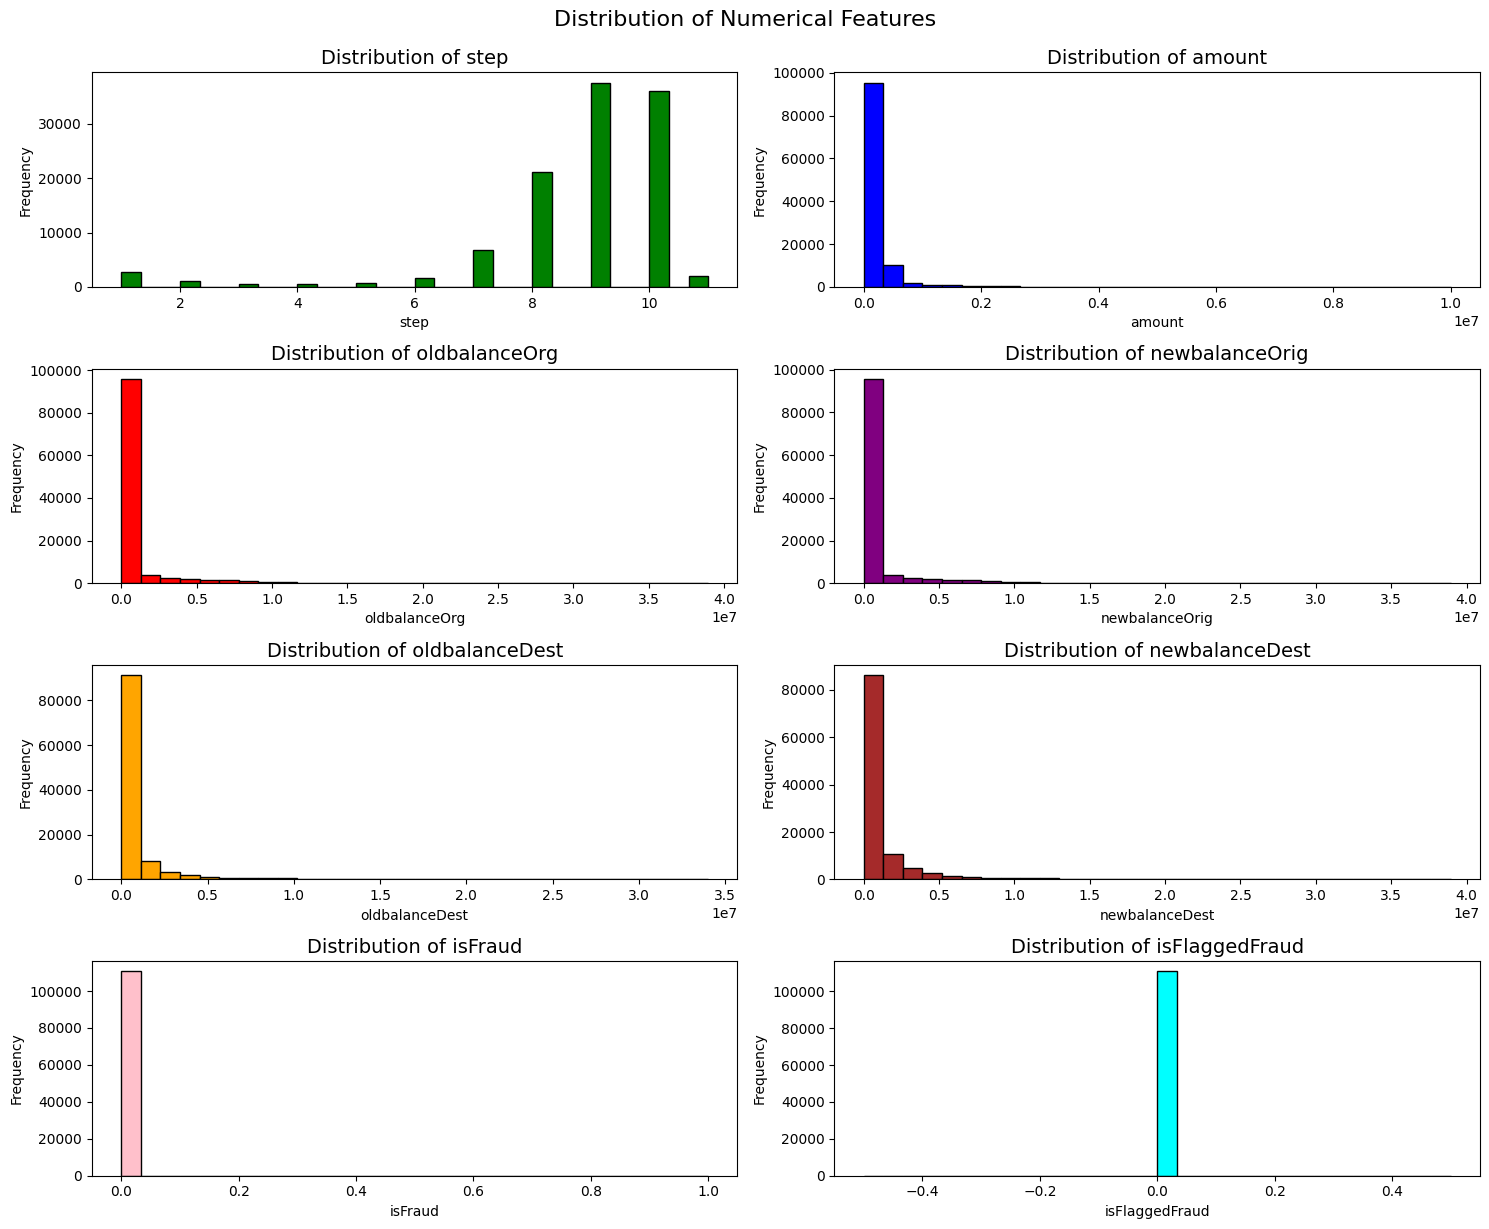

In [ ]:
# Step 3: Distribution Analysis
import matplotlib.pyplot as plt
num_cols = data.select_dtypes(include=[np.number]).columns
colors = ['green', 'blue', 'red', 'purple', 'orange', 'brown', 'pink', 'cyan']
plt.figure(figsize=(15, 12))
for i, col in enumerate(num_cols):
    plt.subplot(4, 2, i+1)
    plt.hist(data[col], bins=30, color=colors[i], edgecolor='black')
    plt.title(f'Distribution of {col}', fontsize=14)
    plt.xlabel(col)
    plt.ylabel('Frequency')
plt.tight_layout()
plt.suptitle("Distribution of Numerical Features", fontsize=16, y=1.02)  # Super title for the whole plot
plt.show()


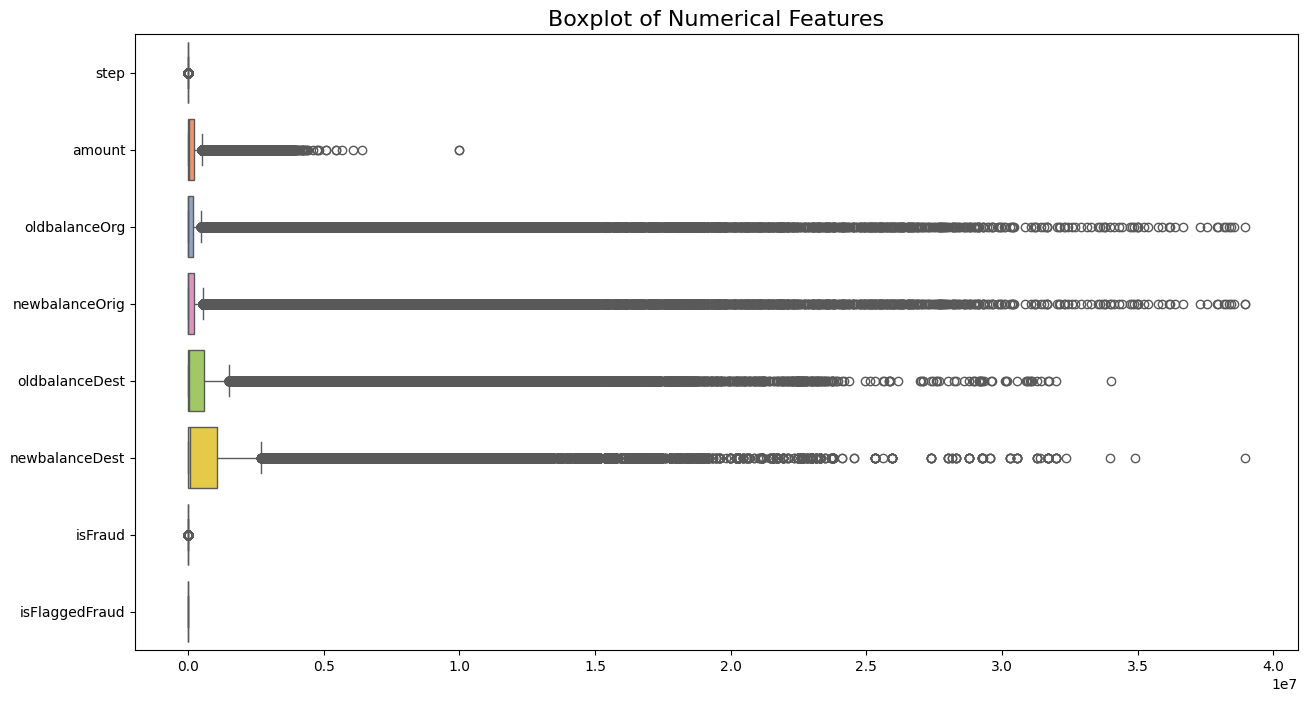

In [ ]:
# Boxplot to detect outliers for all numerical features
plt.figure(figsize=(15, 8))
sns.boxplot(data=data[num_cols], orient="h", palette="Set2")
plt.title("Boxplot of Numerical Features", fontsize=16)
plt.show()

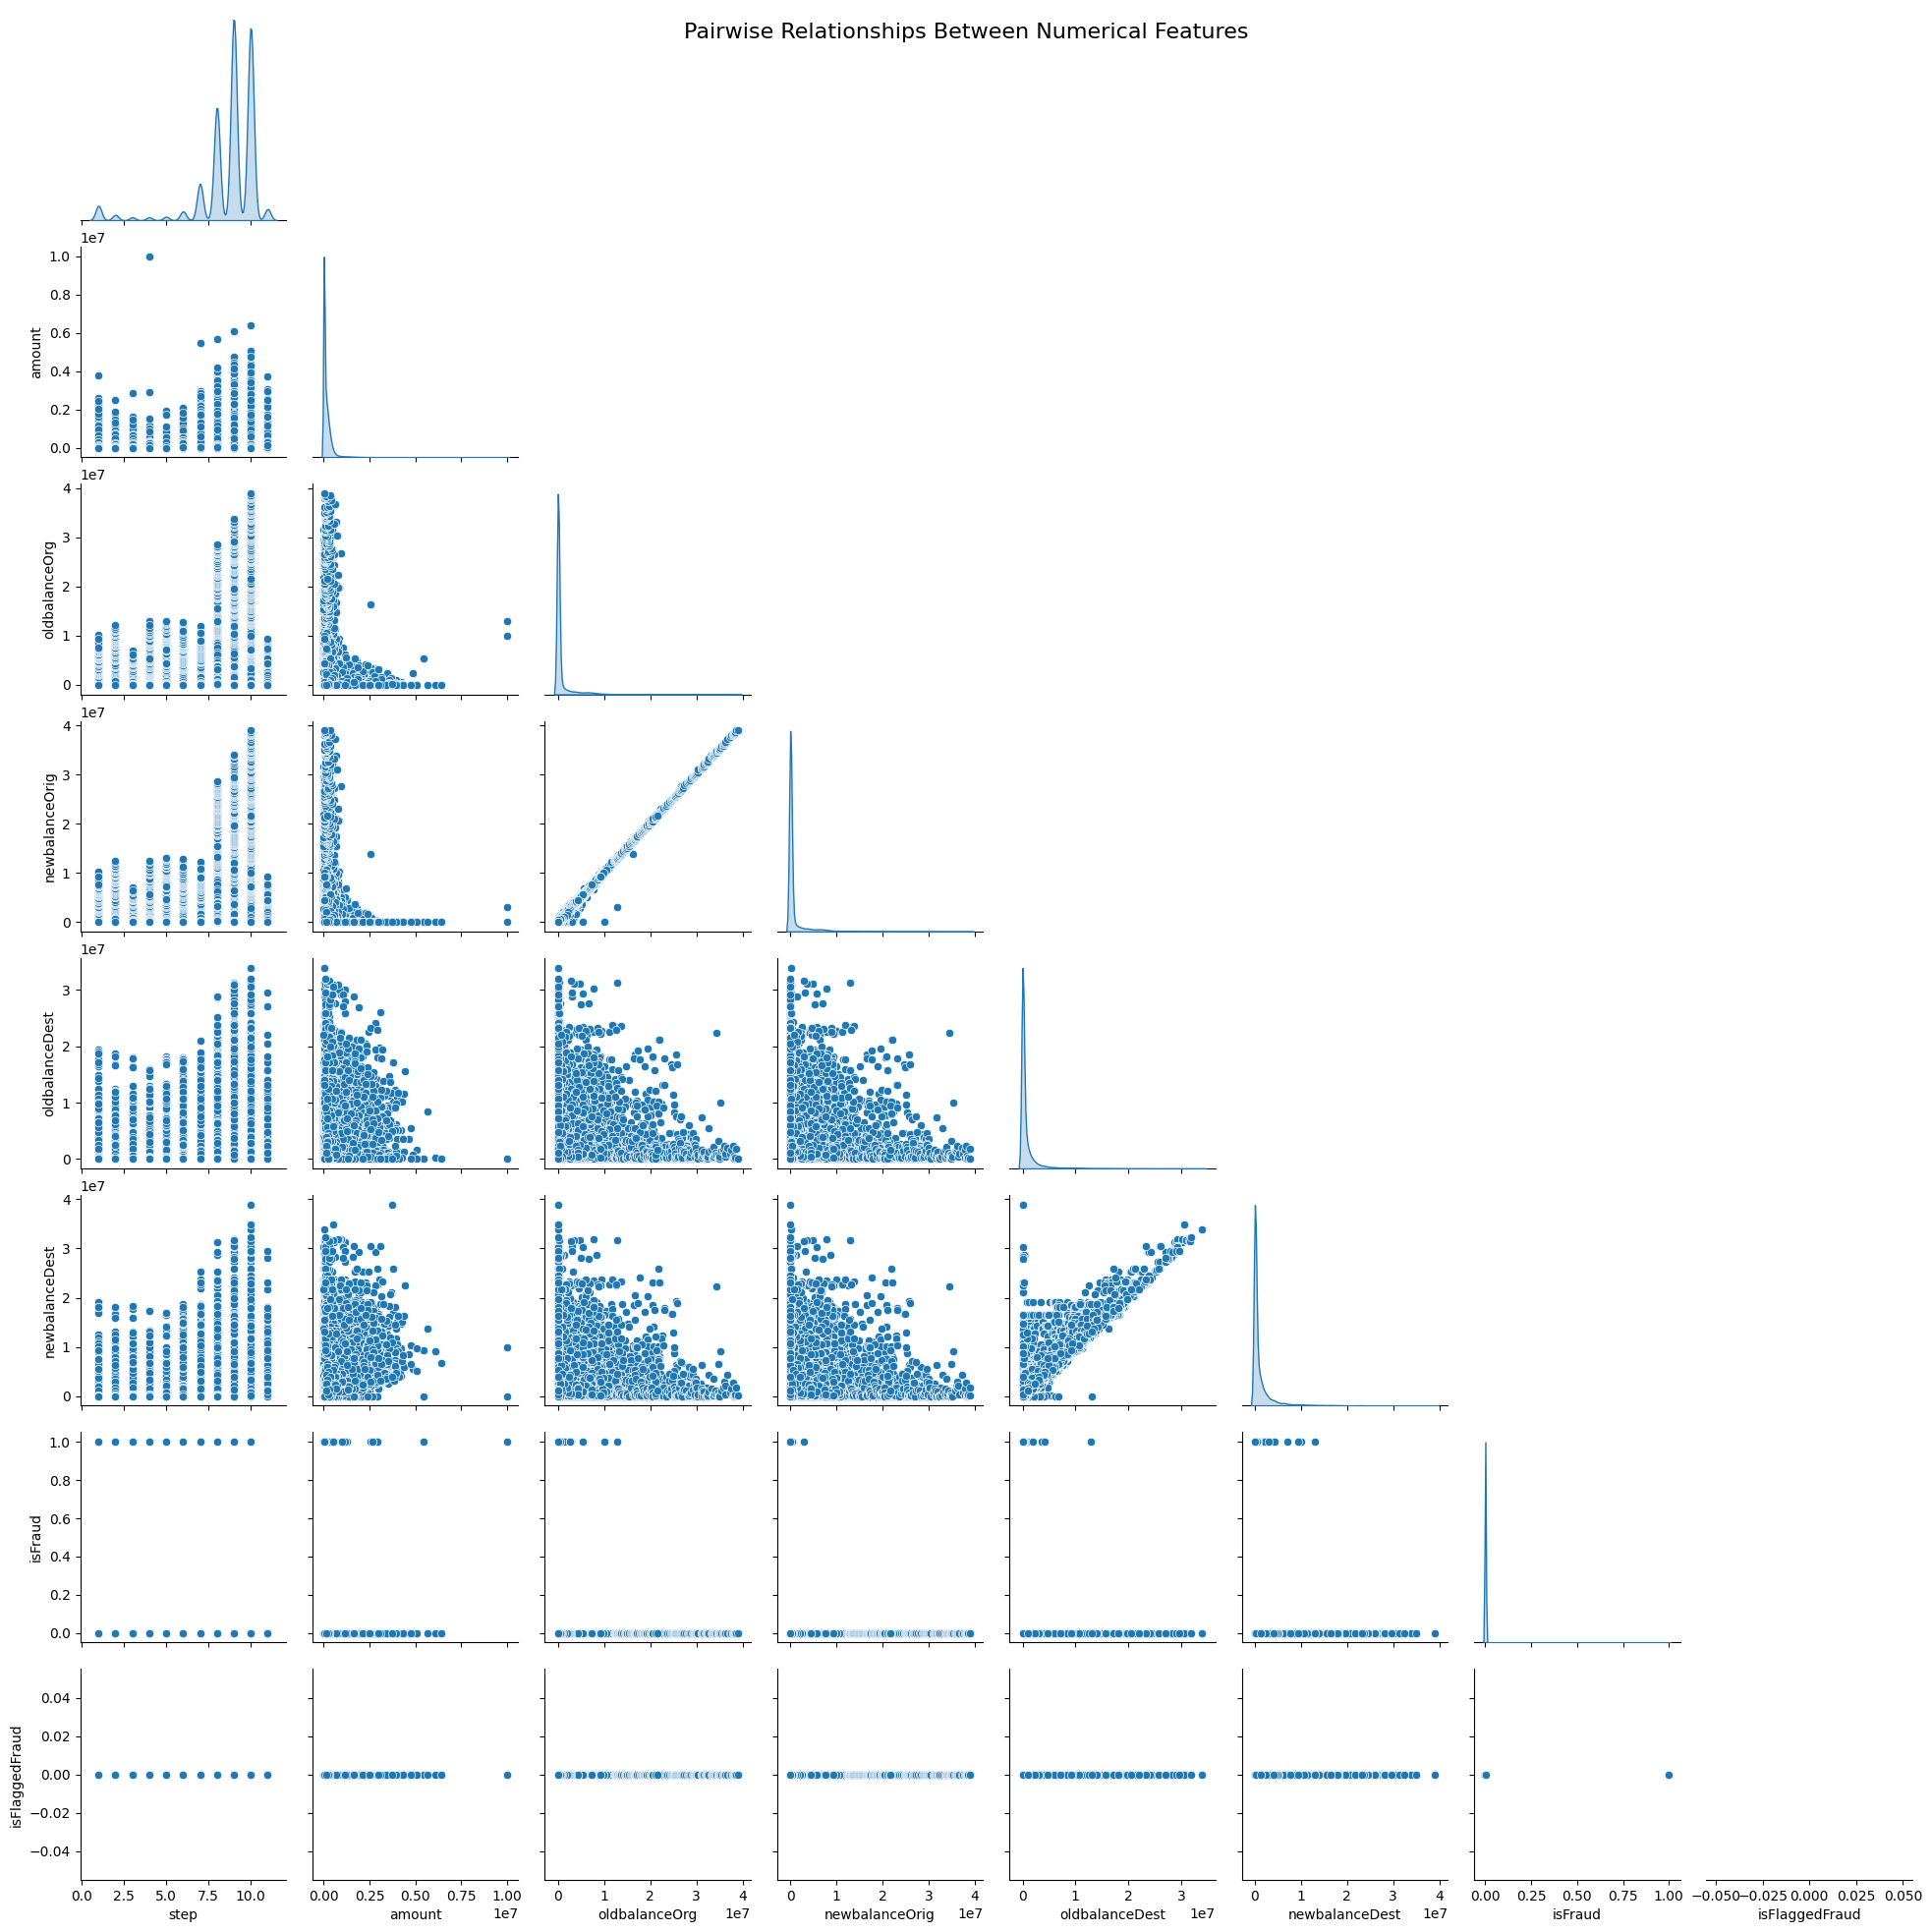

In [ ]:
# Pairplot for relationships between numerical features
sns.pairplot(data[num_cols], diag_kind='kde', corner=True)
plt.suptitle("Pairwise Relationships Between Numerical Features", fontsize=16)
plt.show()

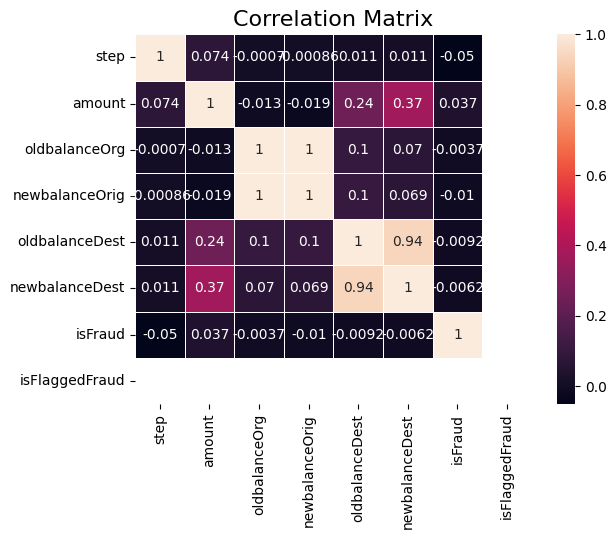

In [ ]:
# Step 4: Correlation Matrix and Heatmap
num_cols = data.select_dtypes(include=[np.number]).columns
correlation_matrix = data[num_cols].corr()
sns.heatmap(correlation_matrix, annot=True, linewidths=0.5)
plt.title("Correlation Matrix", fontsize=16)
plt.show()

<ipython-input-10-0070e12de33f>:7: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(fraud_data[col].dropna(), label='Fraud', shade=True, color='g')
<ipython-input-10-0070e12de33f>:8: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(non_fraud_data[col].dropna(), label='Non-Fraud', shade=True, color='r')


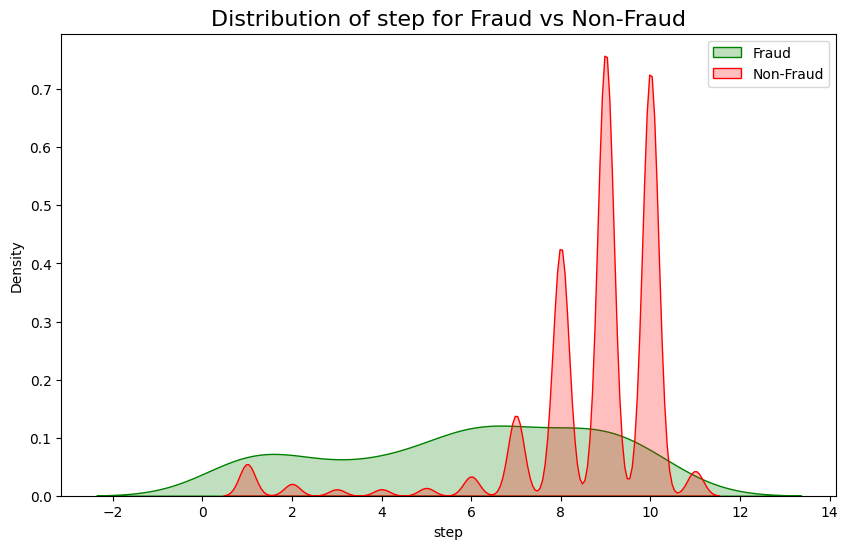

<ipython-input-10-0070e12de33f>:7: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(fraud_data[col].dropna(), label='Fraud', shade=True, color='g')
<ipython-input-10-0070e12de33f>:8: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(non_fraud_data[col].dropna(), label='Non-Fraud', shade=True, color='r')


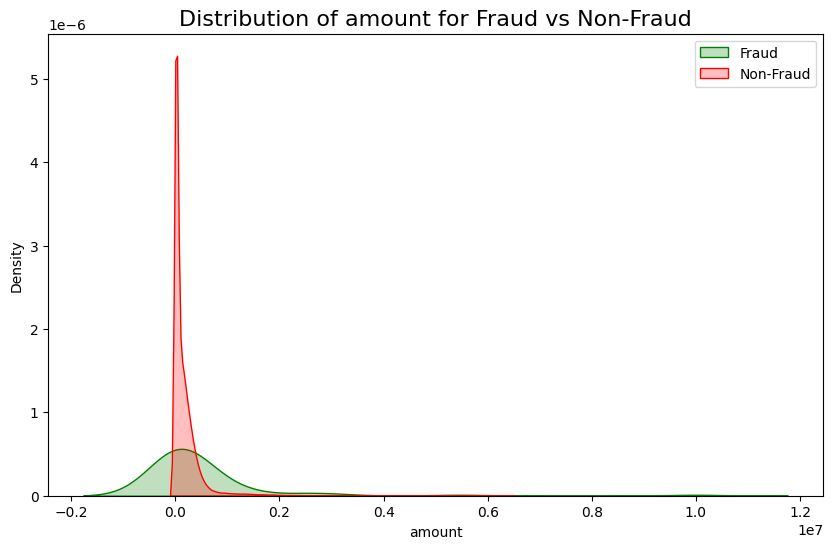

<ipython-input-10-0070e12de33f>:7: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(fraud_data[col].dropna(), label='Fraud', shade=True, color='g')
<ipython-input-10-0070e12de33f>:8: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(non_fraud_data[col].dropna(), label='Non-Fraud', shade=True, color='r')


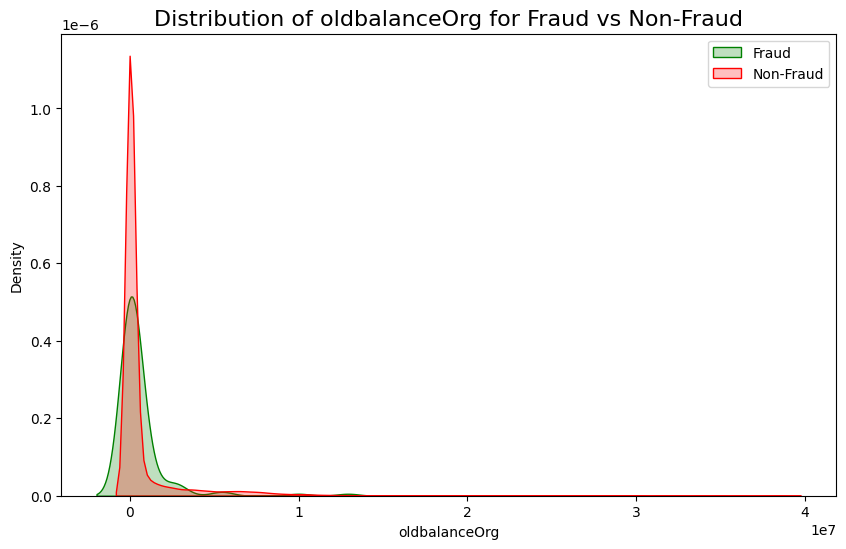

<ipython-input-10-0070e12de33f>:7: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(fraud_data[col].dropna(), label='Fraud', shade=True, color='g')
<ipython-input-10-0070e12de33f>:8: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(non_fraud_data[col].dropna(), label='Non-Fraud', shade=True, color='r')


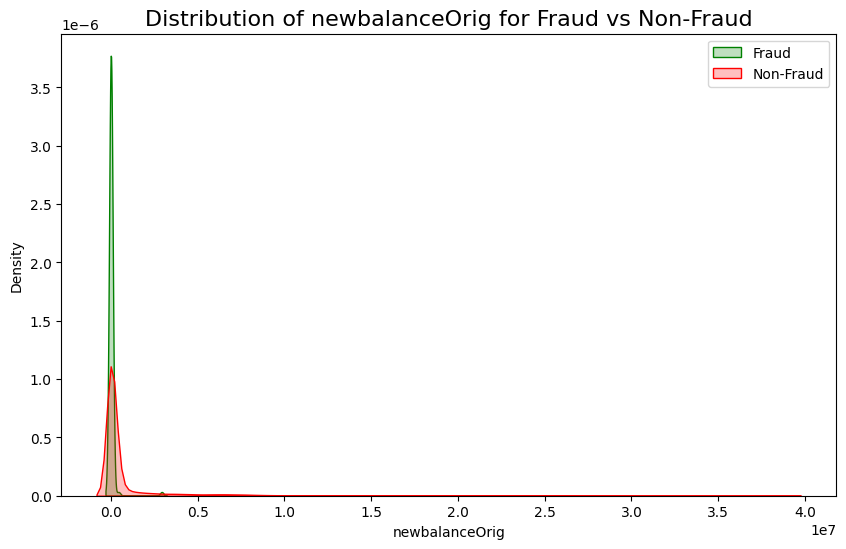

<ipython-input-10-0070e12de33f>:7: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(fraud_data[col].dropna(), label='Fraud', shade=True, color='g')
<ipython-input-10-0070e12de33f>:8: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(non_fraud_data[col].dropna(), label='Non-Fraud', shade=True, color='r')


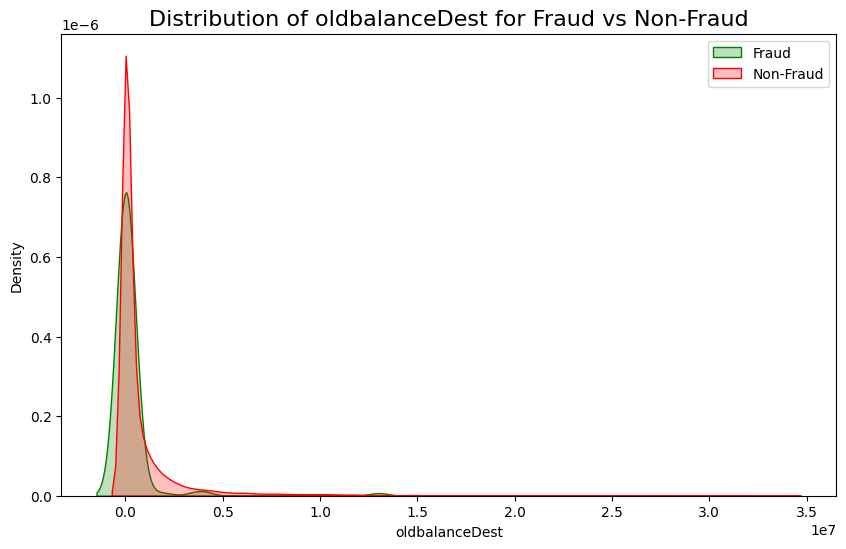

<ipython-input-10-0070e12de33f>:7: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(fraud_data[col].dropna(), label='Fraud', shade=True, color='g')
<ipython-input-10-0070e12de33f>:8: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(non_fraud_data[col].dropna(), label='Non-Fraud', shade=True, color='r')


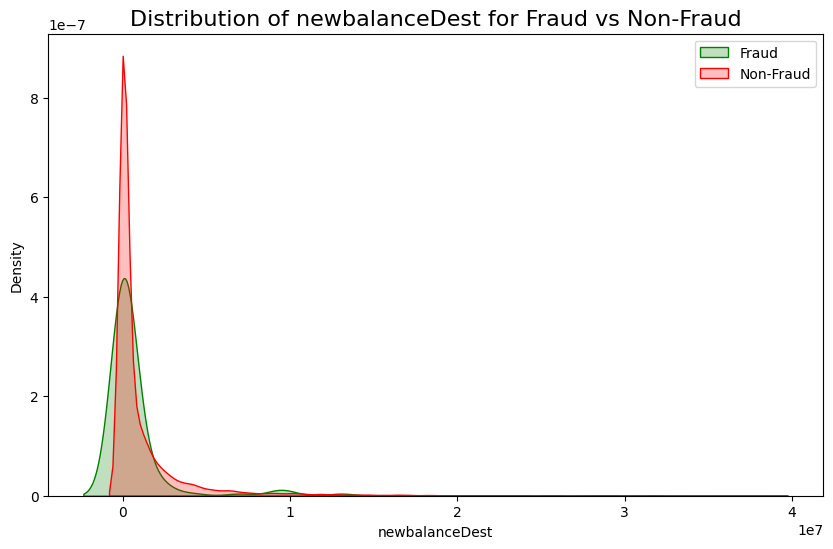

Skipping plot for isFraud: Not enough variability in the data.
Skipping plot for isFlaggedFraud: Not enough variability in the data.


<Figure size 1000x600 with 0 Axes>

<Figure size 1000x600 with 0 Axes>

In [ ]:
# Step 5: Fraud vs Non-Fraud Comparison
fraud_data = data[data['isFraud'] == 1]
non_fraud_data = data[data['isFraud'] == 0]
for col in num_cols:
    plt.figure(figsize=(10, 6))
    if fraud_data[col].nunique() > 1 and non_fraud_data[col].nunique() > 1:
        sns.kdeplot(fraud_data[col].dropna(), label='Fraud', shade=True, color='g')
        sns.kdeplot(non_fraud_data[col].dropna(), label='Non-Fraud', shade=True, color='r')
        plt.title(f'Distribution of {col} for Fraud vs Non-Fraud', fontsize=16)
        plt.legend()
        plt.show()
    else:
        print(f"Skipping plot for {col}: Not enough variability in the data.")


In [ ]:
# Step 6: Outlier Detection using Z-score
for col in num_cols:
    data[f'Zscore_{col}'] = np.abs(stats.zscore(data[col]))
    outliers = data[data[f'Zscore_{col}'] > 3]
    print(f"Number of outliers in {col}: {outliers.shape[0]}")


Number of outliers in step: 4274
Number of outliers in amount: 2548
Number of outliers in oldbalanceOrg: 2430
Number of outliers in newbalanceOrig: 2454
Number of outliers in oldbalanceDest: 2887
Number of outliers in newbalanceDest: 2997
Number of outliers in isFraud: 120
Number of outliers in isFlaggedFraud: 0


In [ ]:
import scipy.stats as stats
if 'amount' in data.columns:
    # Perform the t-test between fraud and non-fraud transaction amounts
    t_stat, p_val = stats.ttest_ind(fraud_data['amount'], non_fraud_data['amount'], equal_var=False)
    print(f"T-statistic for Amount: {t_stat:.4f}, P-value: {p_val:.4f}")
    if p_val < 0.05:
        print("Significant difference in Amount between Fraud and Non-Fraud.")
    else:
        print("No significant difference in Amount between Fraud and Non-Fraud.")
else:
    print("Amount column not found in the dataset.")


T-statistic for Amount: 2.8011, P-value: 0.0059
Significant difference in Amount between Fraud and Non-Fraud.


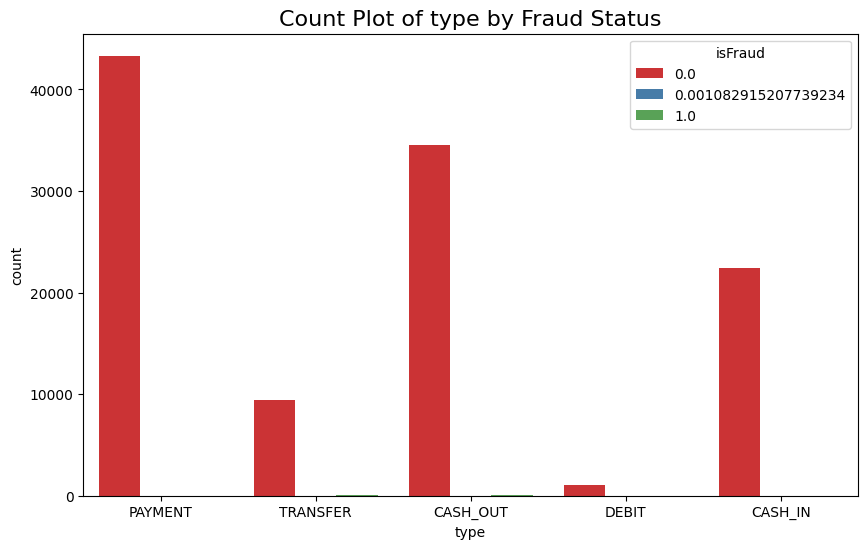

Skipping nameOrig due to too many unique values: 110813
Skipping nameDest due to too many unique values: 56413


In [ ]:
# Step 8: Descriptive Analysis for Categorical Variables
cat_cols = data.select_dtypes(include=['object', 'category']).columns
max_unique_values = 10
for col in cat_cols:
    # Check the number of unique values
    unique_values = data[col].nunique()
    if unique_values <= max_unique_values:
        plt.figure(figsize=(10, 6))
        sns.countplot(data=data, x=col, hue='isFraud', palette='Set1')
        plt.title(f'Count Plot of {col} by Fraud Status', fontsize=16)
        plt.show()
    else:
        print(f"Skipping {col} due to too many unique values: {unique_values}")


In [ ]:
# Chi-square test for categorical variables (if any)
for col in cat_cols:
    contingency_table = pd.crosstab(data[col], data['isFraud'])
    chi2_stat, p_val, dof, ex = stats.chi2_contingency(contingency_table)
    print(f"Chi-square stat for {col}: {chi2_stat}, P-value: {p_val}")
    if p_val < 0.05:
        print(f"There is a significant relationship between {col} and Fraud.")
    else:
        print(f"No significant relationship between {col} and Fraud.")


Chi-square stat for type: 321.3648885980362, P-value: 1.1598143910215466e-64
There is a significant relationship between type and Fraud.
Chi-square stat for nameOrig: 221626.0, P-value: 0.49840208671800845
No significant relationship between nameOrig and Fraud.
Chi-square stat for nameDest: 38166.46489453083, P-value: 1.0
No significant relationship between nameDest and Fraud.


In [ ]:
feature_cols = ['step', 'type', 'amount', 'nameOrig', 'oldbalanceOrg', 'newbalanceOrig', 'nameDest', 'oldbalanceDest', 'newbalanceDest']
X = data[feature_cols]
y = data['isFraud']
# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=123)

In [ ]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.preprocessing import LabelEncoder
label_encoder_type = LabelEncoder()
label_encoder_nameOrig = LabelEncoder()
label_encoder_nameDest = LabelEncoder()
X_train['type'] = label_encoder_type.fit_transform(X_train['type'])
X_train['nameOrig'] = label_encoder_nameOrig.fit_transform(X_train['nameOrig'])
X_train['nameDest'] = label_encoder_nameDest.fit_transform(X_train['nameDest'])
def encode_with_fallback(encoder, series, train_series):
    unique_train_labels = set(train_series.unique())

    return series.apply(lambda x: encoder.transform([x])[0] if x in unique_train_labels else -1)

X_test['type'] = encode_with_fallback(label_encoder_type, X_test['type'], X_train['type'])
X_test['nameOrig'] = encode_with_fallback(label_encoder_nameOrig, X_test['nameOrig'], X_train['nameOrig'])
X_test['nameDest'] = encode_with_fallback(label_encoder_nameDest, X_test['nameDest'], X_train['nameDest'])
clf = DecisionTreeClassifier()
clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)
print(y_pred)


[0. 0. 1. ... 0. 0. 0.]


In [ ]:
from sklearn.metrics import accuracy_score

# Check and convert y_test and y_pred to integer
y_test = y_test.astype(int)
y_pred = y_pred.astype(int)

# Ensure both are binary and print their unique values
print("Unique values in y_test:", set(y_test))
print("Unique values in y_pred:", set(y_pred))

# Model Accuracy, how often is the classifier correct?
print("Accuracy:", accuracy_score(y_test, y_pred))


Unique values in y_test: {0, 1}
Unique values in y_pred: {0, 1}
Accuracy: 0.9351461917940079


In [ ]:
pip install graphviz

In [ ]:
pip install pydotplus

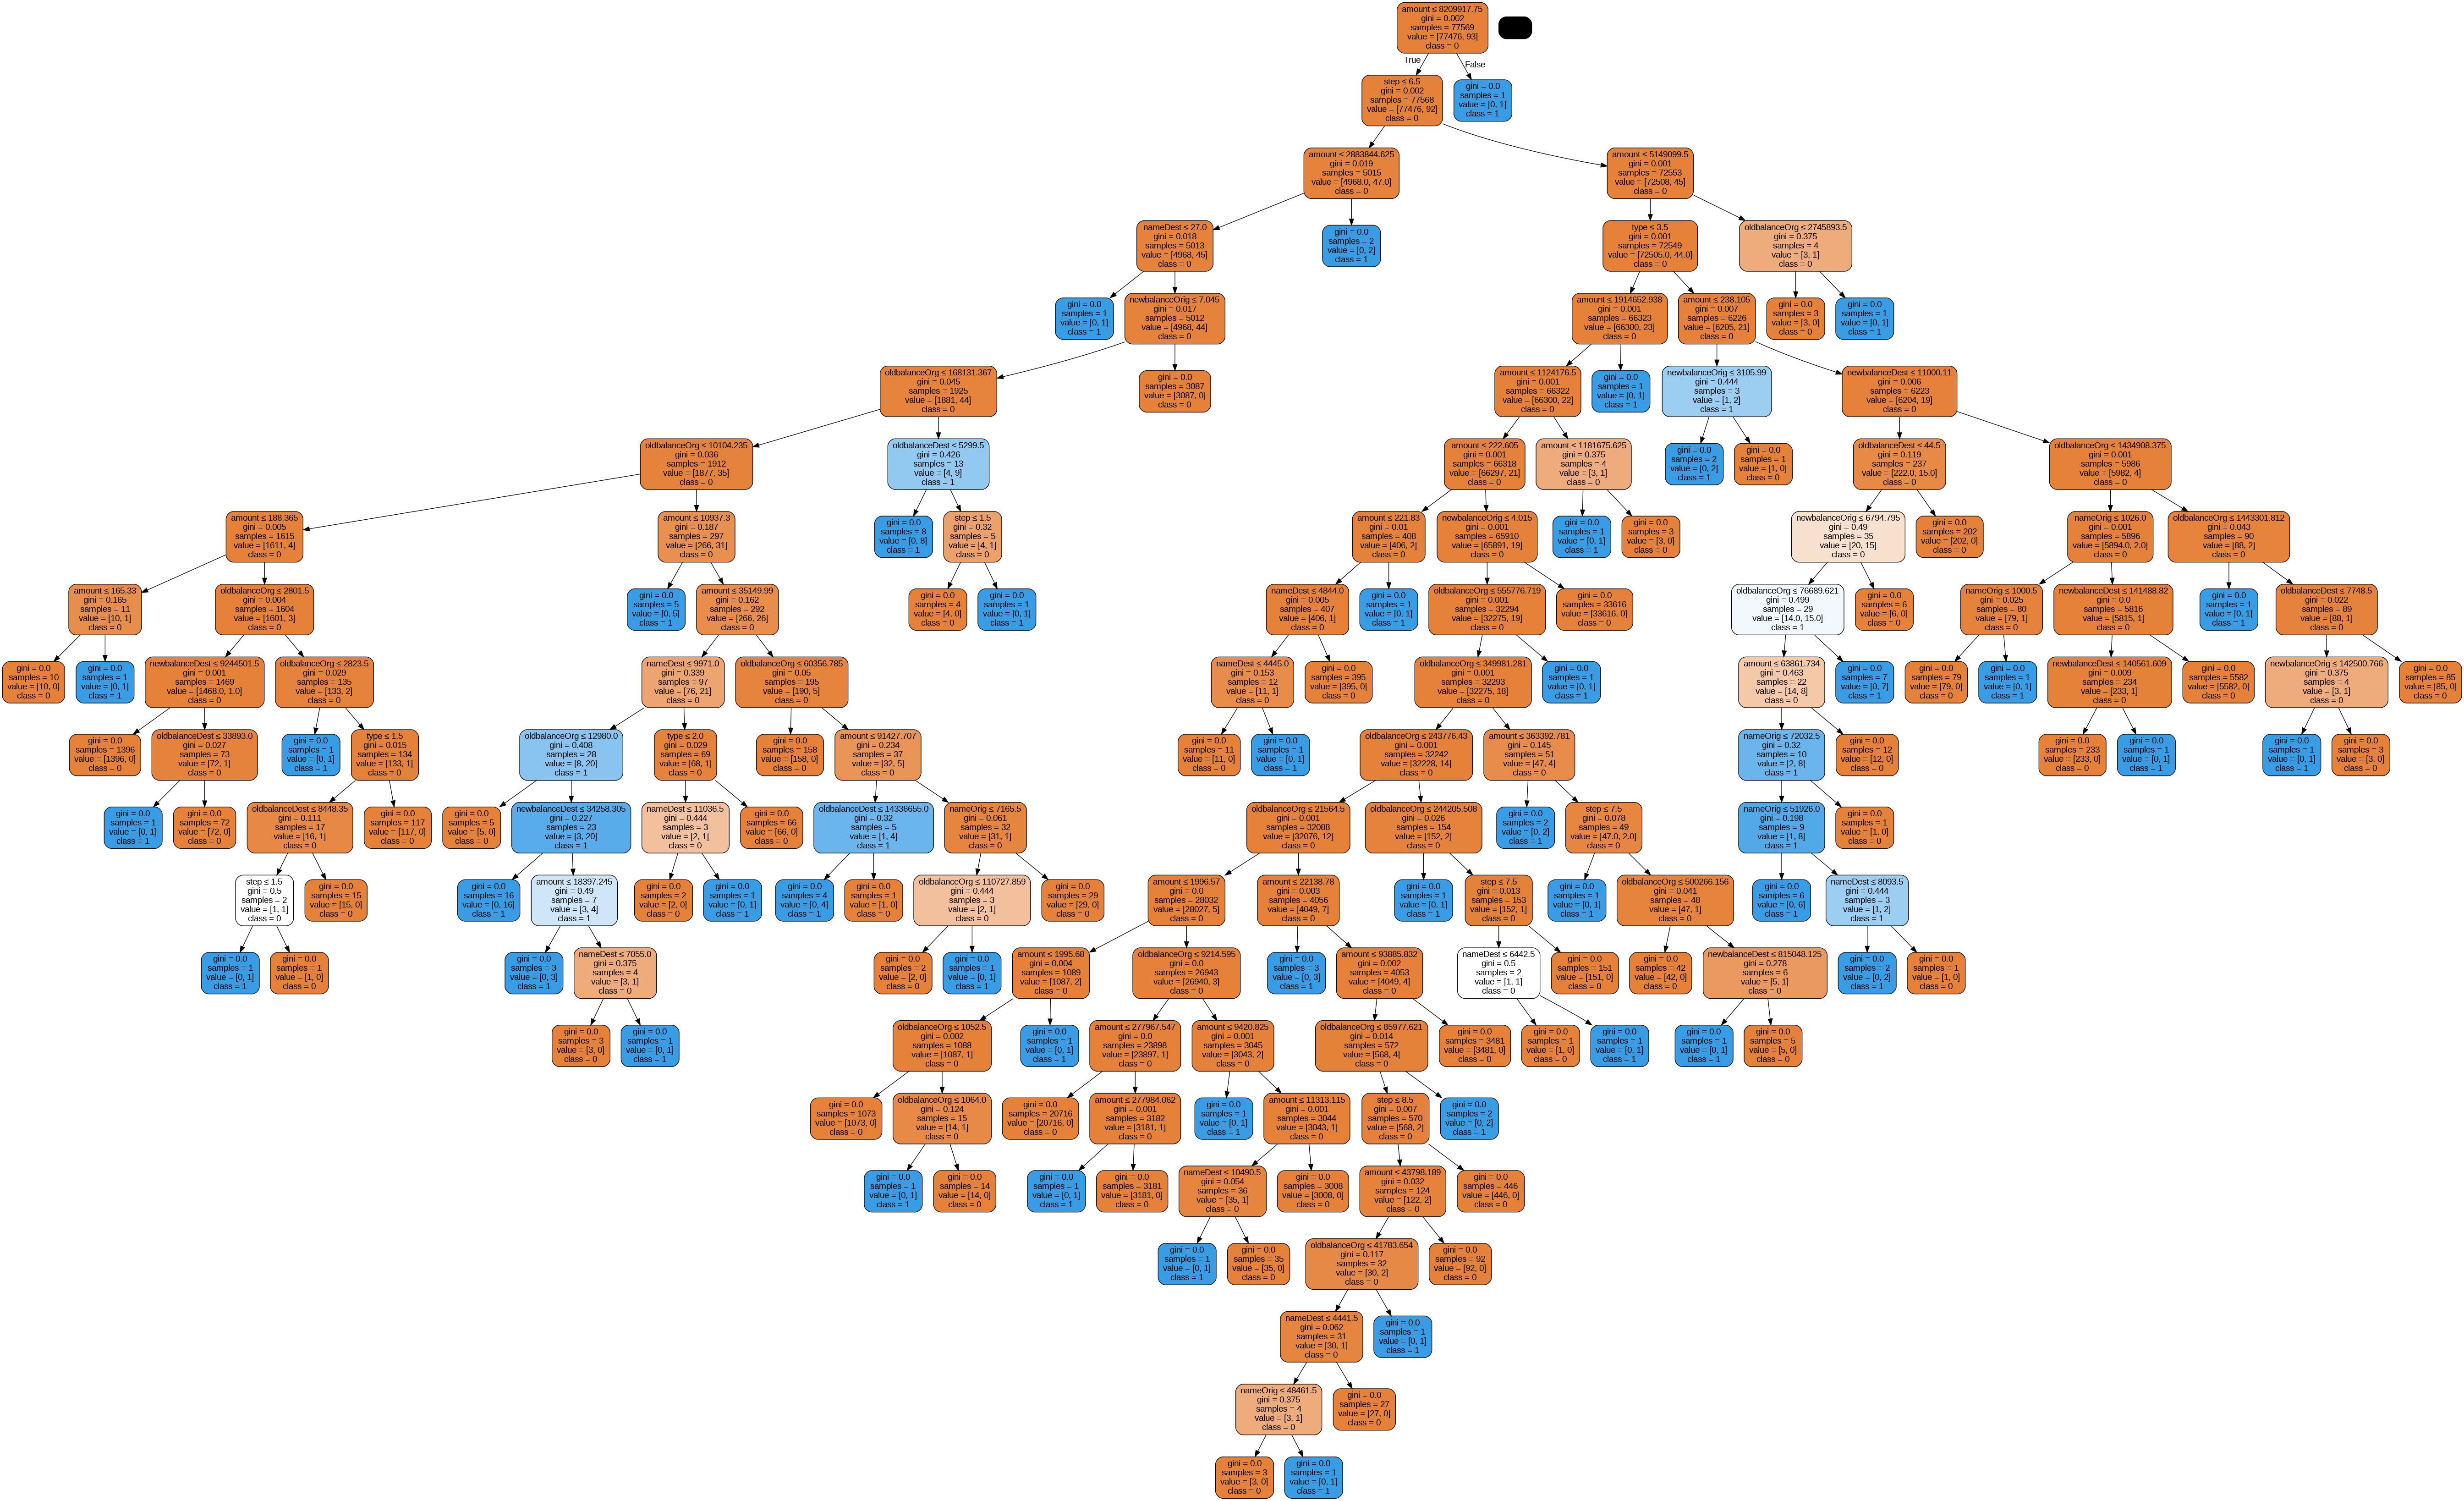

In [ ]:
from sklearn.tree import export_graphviz
from io import StringIO  # Import StringIO from the io module
from IPython.display import Image
import pydotplus
dot_data = StringIO()
export_graphviz(clf, out_file=dot_data,
                filled=True, rounded=True,
                special_characters=True,feature_names = feature_cols,class_names=['0','1'])
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())
graph.write_png('diabetes.png')
Image(graph.create_png())


In [ ]:
#Optimizing performance
# Create Decision Tree classifer object
clf = DecisionTreeClassifier(criterion="entropy", max_depth=3)

# Train Decision Tree Classifer
clf = clf.fit(X_train,y_train)

#Predict the response for test dataset
y_pred = clf.predict(X_test)

# Model Accuracy, how often is the classifier correct?
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))


Accuracy: 0.9991878233666226


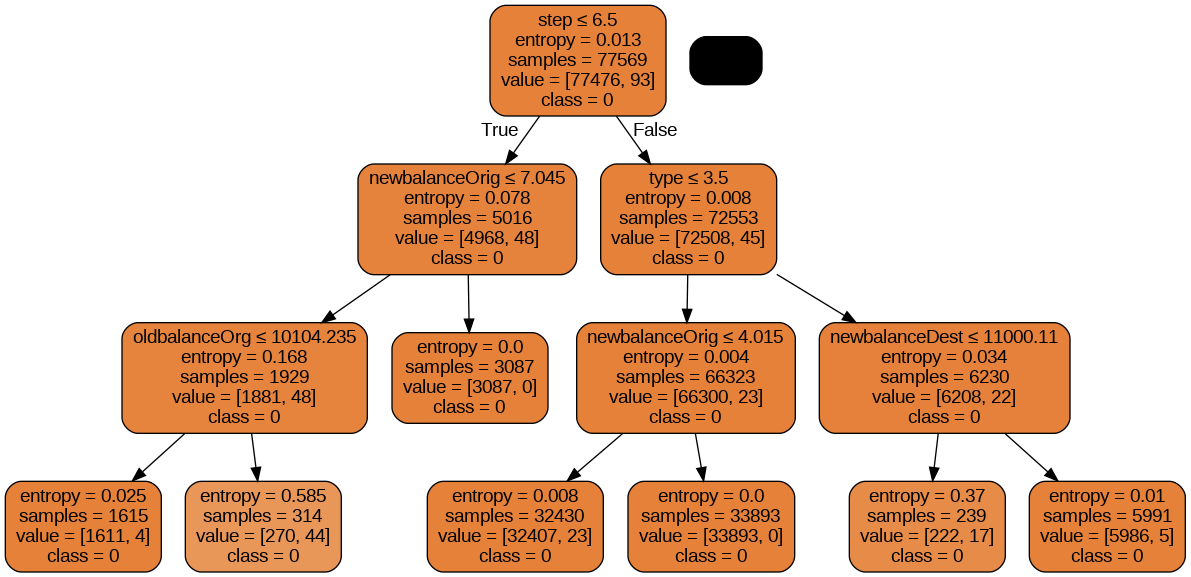

In [ ]:
from io import StringIO  # Corrected import
from IPython.display import Image
from sklearn.tree import export_graphviz
import pydotplus

# Create a StringIO object
dot_data = StringIO()

# Export the decision tree to dot format
export_graphviz(clf, out_file=dot_data,
                filled=True, rounded=True,
                special_characters=True,
                feature_names=feature_cols,  # Use your feature column names
                class_names=['0', '1'])  # Adjust class names as needed

# Generate a graph from the dot data
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())

# Write the graph to a PNG file
graph.write_png('diabetes.png')

# Display the image
Image(graph.create_png())
